In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
from scipy.stats import norm
from sklearn.metrics import pairwise_distances
%matplotlib inline

## Задание 1
Вычислите производную функции:

$tg^2(sin(x) + cos(2x + 3))$

в точке $x0 = 1$

In [27]:
x = sympy.Symbol('x')
function = sympy.tan(sympy.sin(x) + sympy.cos(2 * x + 3)) ** 2

In [28]:
derived_function = sympy.diff(function, x)

In [29]:
print('Производная функции в точке x0 = ' + str(derived_function.evalf(subs={'x': 1})))

Производная функции в точке x0 = 55.3859176353379


## Задание 2
Дан объект в $2D$ пространстве

При помощи матричных операций выполните:

* Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)

In [30]:
def show_object(matrix):
    x = matrix[:,0]
    y = matrix[:,1]
    plt.plot(x, y)
    plt.ylim([-200, 200])
    plt.xlim([-200, 200])
    plt.show()

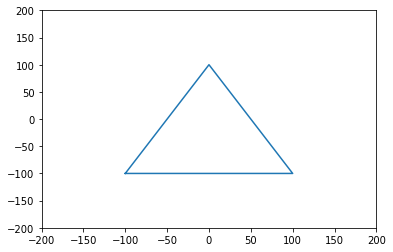

In [31]:
A = np.array([
    [-100, -100, 1],
    [0, 100, 1],
    [100, -100, 1],
    [-100, -100, 1]
])

show_object(A)

### Масштабирование на (0.5, 1.5)

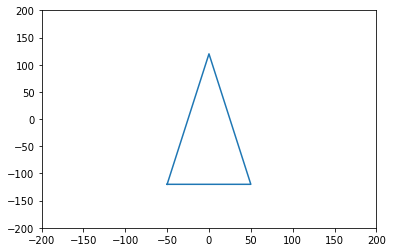

In [32]:
SCALE = 0.5
SCALE_MATRIX = np.array([
    [0.5, 0, 0],
    [0, 1.2, 0],
    [0, 0, 1]
])



result_scaled_matrix = np.array([np.matmul(SCALE_MATRIX, vector) for vector in A])
show_object(result_scaled_matrix)

### Cмещение на (200, 300)

In [33]:
def sum_vector_elemets(vector1, vector2):
    result_vectors_sum = []
    for i in range(len(vector1)):
        result_vectors_sum.append(vector1[i] + vector2[i])
        
    return np.array(result_vectors_sum)

def show_biased_object(matrix):
    x = matrix[:,0]
    y = matrix[:,1]
    plt.plot(x, y)
    plt.xlim([-200, 600])
    plt.ylim([-200, 800])
    plt.show()

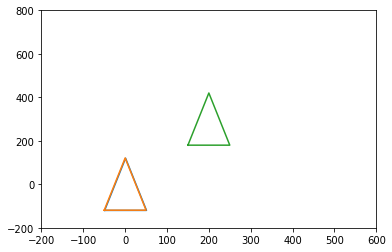

In [34]:
BAISED_VECTOR = [[1,0,200],[0,1,300],[0,0,1]]
baised_matrix = np.array([sum_vector_elemets(vector, BAISED_VECTOR) for vector in result_scaled_matrix])
show_biased_object(baised_matrix)

## Задание 3
Найдите собственные значения и собственные вектора матрицы:

In [35]:
MATRIX = np.array([
    [1, 4], 
    [1, 1]
])

In [36]:
print(f'Собственные значения: {np.linalg.eig(MATRIX)[0]}\n Вектора матрицы:\n {np.linalg.eig(MATRIX)[1]}')

Собственные значения: [ 3. -1.]
 Вектора матрицы:
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


## Задание 4
Дана функция с неизвестными параметрами a и b, вам также известны значения функции $f(x)$ в точках $x$.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку $error$.

In [37]:
def f(x, a, b):
    return np.e ** a * np.sin(b * x) + x

In [38]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

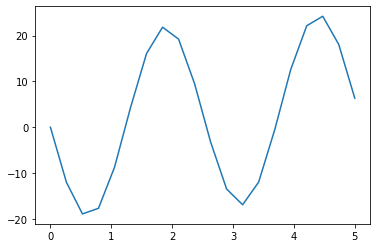

In [39]:
plt.plot(x, fx)
plt.show()

In [40]:
def error(params, x, fx):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

## Задание 5
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))
Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [63]:
def seacrh_min_distance(distance_array):
    distance_array_user = list(distance_array)
    distance_array_user.remove(min(distance_array_user))
    min_index = distance_array_user.index(min(distance_array_user)) + 1
    return min_index

In [64]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [65]:
pairwise_distances_array = pairwise_distances(raitings, metric='cosine')

In [66]:
result_array = []

for i in range(len(pairwise_distances_array)):
    for j in range(len(pairwise_distances_array[i])):
        if pairwise_distances_array[i, j] == 0.0:
            result_array.append((i, seacrh_min_distance(pairwise_distances_array[i])))

In [67]:
# Первый столбец индекс пользователя
# Второй столбец индекс наиболее похожего пользователя
result_array 

[(0, 8),
 (1, 4),
 (2, 9),
 (3, 9),
 (4, 8),
 (5, 9),
 (6, 4),
 (7, 6),
 (8, 1),
 (9, 3)]